# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [39]:
def one_sample_ttest(sample, popmean, alpha):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats
    # Visualize sample distribution for normality 
    dfSample = pd.DataFrame( sample)
    ax = sns.distplot(sample)
    
    # Population mean 
    n = len(sample)
    mu = popmean
    # Sample mean (x̄) using NumPy mean()
    x_hat = round(float(dfSample.mean()),3)
    # Sample Standard Deviation (sigma) using Numpy
    sigma_sample = round(float(dfSample.std()),3)
    # Degrees of freedom
    df = n - 1
    # Calculate the critical t-value
    t = round((x_hat-mu) / (sigma_sample/np.sqrt(n)),3)
    t_crit = np.round(stats.t.ppf(1 - 0.05, df=df),3)
    # Calculate the t-value and p-value      
    p = round(stats.ttest_1samp(a= sample, popmean= mu)[1],3)
    #calculate the effect size
    superiority = sum(x>mu for x in sample)/n
    # generate points on the x axis between -5 and 5:
    xs = np.linspace(-5, 5, 200)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    # the second argument is the degrees of freedom
    ys = stats.t.pdf(xs, df, 0, 1)

    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))

    # get the current "axis" out of the figure
    ax = fig.gca()

    # plot the lines using matplotlib's plot function:
    ax.plot(xs, ys, linewidth=3, color='darkblue')

    # plot a vertical line for our measured difference in rates t-statistic
    ax.axvline(t, color='green', linestyle='--', lw=5,label='Observed t-statistic')
    ax.axvline(t_crit, color='red', linestyle='--', lw=5,label='t-critical value')

    ax.legend()
    plt.show()
    # return results
    def result(t,t_crit):
        if t > t_crit:
            return 'reject'
        else:
            return 'we fail to reject'
    return print(f'''
                With a sample mean of {x_hat} and a population mean of {popmean},
                we have a t-value of {str(t)}, a p-value of {p}, and a superiority of {superiority}.
                With alpha being 0.05 this implies the t-critical value is {str(t_crit)}. 
                Thus we {result(t,t_crit)} the null hypothesis
            ''')

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

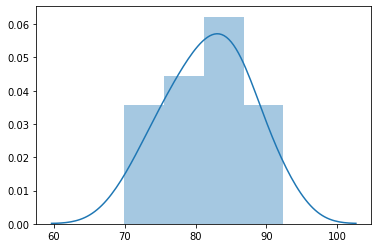

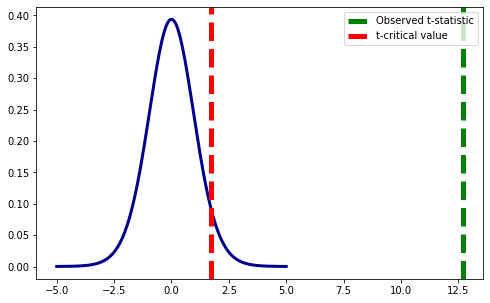


                With a sample mean of 81.8 and a population mean of 65,
                we have a t-value of 12.687, a p-value of 0.0, and a superiority of 1.0.
                With alpha being 0.05 this implies the t-critical value is 1.729. 
                Thus we reject the null hypothesis
            


In [40]:
one_sample_ttest( 
    [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1,78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3],
    65,
    .05
)

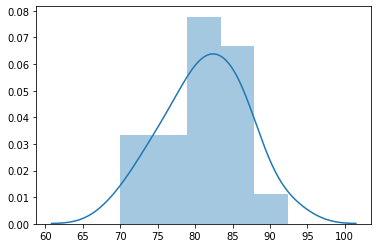

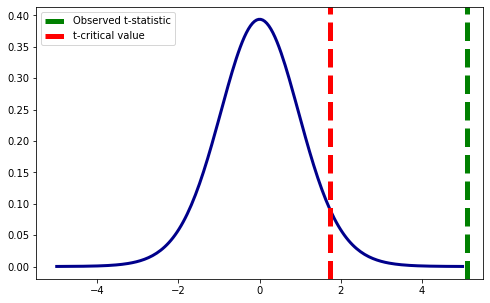


                With a sample mean of 81.3 and a population mean of 75,
                we have a t-value of 5.102, a p-value of 0.0, and a superiority of 0.85.
                With alpha being 0.05 this implies the t-critical value is 1.729. 
                Thus we reject the null hypothesis
            


In [42]:
one_sample_ttest( 
    [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1,78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3],
    75,
    .05
)


## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 